In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pubg2 = pd.read_csv("pubg.csv")
pubg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444415 entries, 0 to 4444414
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [3]:
# correlation matrix
# features in type 'object' (Id, groupId, matchId, matchType) are dropped here
corr = pubg2.corr()

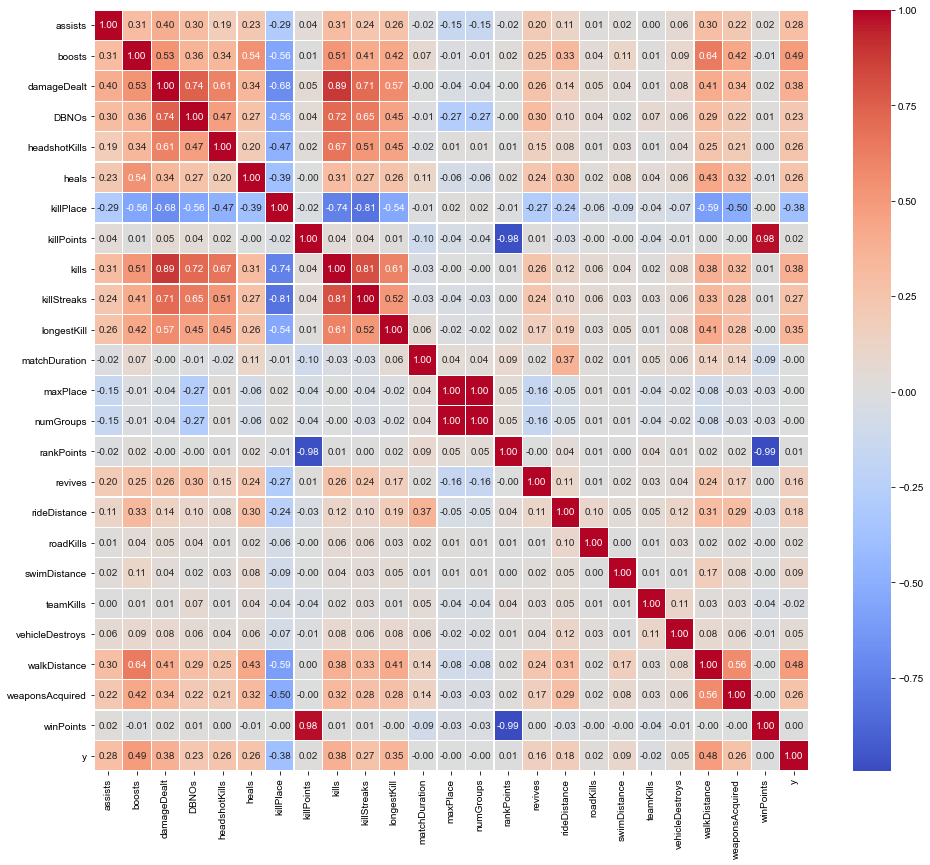

In [4]:
# plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, linewidths=.3, cmap='coolwarm', fmt='.2f')
sns.set(font_scale=1)
plt.show()

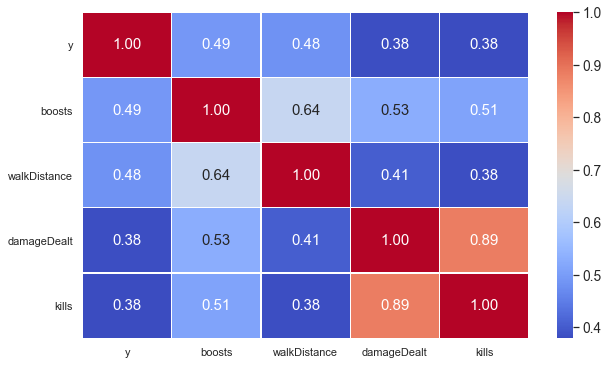

In [5]:
# let's see the heatmap for the 4 features that are most correlated with targat
f,ax = plt.subplots(figsize=(10, 6))
cols = corr.nlargest(5, 'y')['y'].index
cm = np.corrcoef(pubg2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, linewidths=.3, cmap='coolwarm', fmt='.2f',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We decided to not use PCA here because using PCA will decrease the interpretability of our model, while our goal is to find out what behaviours can giva us higher chance of win.

### Feature Engineering

Based on our game experience, we think there are some hidden features in the data that are correlated with our target and some features can be combined to be more meaningful.

1) As there is no guarantee of there being 100 players per match, some features are not compareable in match of different sizes (i.e. kills, it's easier to meet and kill someone in a match of size 100 than of size 80), so it's meaningful to normalize these features based on number of players in the match.

In [6]:
# create a new feature for number of players in a match
pubg2['numPlayers'] = pubg2.groupby('matchId')['matchId'].transform('count')
pubg2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,y,numPlayers
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.9,0,0,0,75,...,0.0000,0,0.00,0,0,202.80,3,0,0,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0,97


In [7]:
pubg2['groupSize'] = pubg2.groupby('groupId')['groupId'].transform('count')
pubg2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,y,numPlayers,groupSize
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0,0.00,0,0,244.80,1,1466,0,96,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,...,0,11.04,0,0,1434.00,5,0,0,91,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0,0,0,0,47,...,0,0.00,0,0,161.80,2,0,0,98,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.9,0,0,0,75,...,0,0.00,0,0,202.80,3,0,0,91,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0,0,0,0,45,...,0,0.00,0,0,49.75,2,0,0,97,1


In [8]:
# from collections import Counter
pubg2['meanGroupSize'] = pubg2.groupby('matchId')['groupSize'].transform('mean')
pubg2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,y,numPlayers,groupSize,meanGroupSize
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0.00,0,0,244.80,1,1466,0,96,4,4.333333
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,...,11.04,0,0,1434.00,5,0,0,91,4,4.626374
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0,0,0,0,47,...,0.00,0,0,161.80,2,0,0,98,2,2.367347
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.9,0,0,0,75,...,0.00,0,0,202.80,3,0,0,91,1,3.923077
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0,0,0,0,45,...,0.00,0,0,49.75,2,0,0,97,1,1.041237


We want to normalize the following features:

damageDealt - Total damage dealt. 

matchDuration - Duration of match in seconds.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

kills - Number of enemy players killed.

In [9]:
pubg2['damageDealtN'] = pubg2['damageDealt']*((100-pubg2['numPlayers'])/100 + 1)
pubg2['matchDurationN'] = pubg2['matchDuration']*((100-pubg2['numPlayers'])/100 + 1)
pubg2['maxPlaceN'] = pubg2['maxPlace']*((100-pubg2['numPlayers'])/100 + 1)
pubg2['killsN'] = pubg2['kills']*((100-pubg2['numPlayers'])/100 + 1)
pubg2[['numPlayers','damageDealt','damageDealtN', 'matchDuration','matchDurationN', 'maxPlace', 'maxPlaceN', 'kills', 'killsN']].head()

,numPlayers,damageDealt,damageDealtN,matchDuration,matchDurationN,maxPlace,maxPlaceN,kills,killsN
0,96,0.0,0.000,1306,1358.24,28,29.12,0,0.00
1,91,91.5,99.735,1777,1936.93,26,28.34,0,0.00
2,98,68.0,69.360,1318,1344.36,50,51.00,0,0.00
3,91,32.9,35.861,1436,1565.24,31,33.79,0,0.00
4,97,100.0,103.000,1424,1466.72,97,99.91,1,1.03


In [10]:
pubg2 = pubg2.drop(columns = ['numPlayers','damageDealt', 'matchDuration', 'maxPlace', 'kills'])

(2) Some features can be combined

In [11]:
pubg2['items'] = pubg2['heals'] + pubg2['boosts']
pubg2['total_distance'] = pubg2['rideDistance'] + pubg2['swimDistance'] + pubg2['walkDistance']
pubg2[['heals','boosts', 'items','rideDistance', 'swimDistance', 'walkDistance','total_distance']].head()

,heals,boosts,items,rideDistance,swimDistance,walkDistance,total_distance
0,0,0,0,0.0000,0.00,244.80,244.8000
1,0,0,0,0.0045,11.04,1434.00,1445.0445
2,0,0,0,0.0000,0.00,161.80,161.8000
3,0,0,0,0.0000,0.00,202.80,202.8000
4,0,0,0,0.0000,0.00,49.75,49.7500


In [12]:
pubg2[['heals','boosts', 'items','rideDistance', 'swimDistance', 'walkDistance','total_distance']].head()
# pubg2 = pubg2.drop(columns = ['heals','boosts', 'rideDistance', 'swimDistance', 'walkDistance'])

,heals,boosts,items,rideDistance,swimDistance,walkDistance,total_distance
0,0,0,0,0.0000,0.00,244.80,244.8000
1,0,0,0,0.0045,11.04,1434.00,1445.0445
2,0,0,0,0.0000,0.00,161.80,161.8000
3,0,0,0,0.0000,0.00,202.80,202.8000
4,0,0,0,0.0000,0.00,49.75,49.7500


In [13]:
# solo = pubg2.loc[pubg2['matchType'].str.contains('solo')]
# pd.unique(solo['matchType'])

### Train-test split

In [14]:
from sklearn.model_selection import train_test_split
# for the model of all match type
data = pubg2.copy().drop(columns = ['Id', 'groupId', 'matchId'])
train = data.sample(frac = 0.7, random_state = 0)
test = data.drop(train.index)
# further split for validation
validation = train.sample(frac = 0.3, random_state = 0)
train = train.drop(validation.index)
modelVal = test.sample(frac = 0.3, random_state = 0)
test = test.drop(modelVal.index)

### Split based on match type

We think the importance features might be different for different match types. 

Before doing feature selection, we will split the data based on match type first. 

In [15]:
# for model of solo
solo_train = train.loc[train['matchType'].str.contains('solo')].drop(columns = 'matchType')
solo_test = test.loc[test['matchType'].str.contains('solo')].drop(columns = 'matchType')
solo_val = validation.loc[validation['matchType'].str.contains('solo')].drop(columns = 'matchType')
solo_modelVal = modelVal.loc[modelVal['matchType'].str.contains('solo')].drop(columns = 'matchType')

In [16]:
# for model of duo
duo_train = train.loc[train['matchType'].str.contains('duo')].drop(columns = 'matchType')
duo_test = test.loc[test['matchType'].str.contains('duo')].drop(columns = 'matchType')
duo_val = validation.loc[validation['matchType'].str.contains('duo')].drop(columns = 'matchType')
duo_modelVal = modelVal.loc[modelVal['matchType'].str.contains('duo')].drop(columns = 'matchType')

In [17]:
# for model of squad
squad_train = train.loc[train['matchType'].str.contains('squad')].drop(columns = 'matchType')
squad_test = test.loc[test['matchType'].str.contains('squad')].drop(columns = 'matchType')
squad_val = validation.loc[validation['matchType'].str.contains('squad')].drop(columns = 'matchType')
squad_modelVal = modelVal.loc[modelVal['matchType'].str.contains('squad')].drop(columns = 'matchType')

In [18]:
train = train.drop(columns = 'matchType')
test = test.drop(columns = 'matchType')
validation = validation.drop(columns = 'matchType')
modelVal = modelVal.drop(columns = 'matchType')

### Use RandomForest to select features based on feature importance.

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

### Full data

In [20]:
# Since the dataset is too large, we use a sample of size 5000 to do the feature selection
# Find the important features for all match types
trainRF = train.sample(n = 50000,random_state = 0)
xTrain = trainRF.copy().drop(columns ='y')
yTrain = trainRF['y']
xVal = validation.copy().drop(columns ='y')
yVal = validation['y']

In [21]:
rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt')
rf.fit(xTrain, yTrain)

RandomForestClassifier(max_features='sqrt')

In [22]:
feature_importance = rf.feature_importances_

Text(0.5, 0, 'Random Forest Feature Importance')

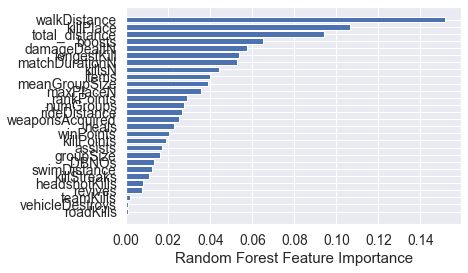

In [23]:
sorted_idx = feature_importance.argsort()
plt.barh(xTrain.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = [0.01,0.02,0.03,0.04,0.05]
bestThre = 0.01
acc = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(xTrain)
    # train model
    selection_model = RandomForestClassifier(n_estimators= 30)
    selection_model.fit(select_X_train, yTrain)
    # eval model
    select_X_val = selection.transform(xVal)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(yVal, predictions)
    if accuracy > acc:
        acc = accuracy
        bestThre = thresh
    print("Thresh=%.2f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.01, n=23, Accuracy: 92.27%
Thresh=0.02, n=17, Accuracy: 92.07%
Thresh=0.03, n=11, Accuracy: 92.13%
Thresh=0.04, n=9, Accuracy: 92.09%
Thresh=0.05, n=7, Accuracy: 91.80%


In [25]:
indices = np.argsort(-feature_importance)
i = 0
while feature_importance[indices[i]] > bestThre:
    i += 1
print(i, ' features to keep')

23  features to keep


In [26]:
featKeep = xTrain.columns[indices[:i]]
featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'boosts', 'damageDealtN',
       'longestKill', 'matchDurationN', 'killsN', 'items', 'meanGroupSize',
       'maxPlaceN', 'rankPoints', 'numGroups', 'rideDistance',
       'weaponsAcquired', 'heals', 'winPoints', 'killPoints', 'assists',
       'groupSize', 'DBNOs', 'swimDistance', 'killStreaks'],
      dtype='object')

### Solo data

In [27]:
# Find the important features for solo
solo_trainRF = solo_train.sample(n = 50000, random_state = 0)
solo_xTrain = solo_trainRF.copy().drop(columns ='y')
solo_yTrain = solo_trainRF['y']
solo_xVal = solo_val.copy().drop(columns ='y')
solo_yVal = solo_val['y']

In [28]:
solo_rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt')
solo_rf.fit(solo_xTrain, solo_yTrain)

RandomForestClassifier(max_features='sqrt')

Text(0.5, 0, 'Random Forest Feature Importance')

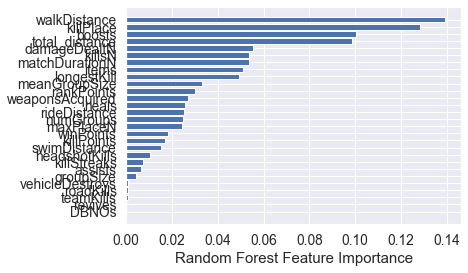

In [29]:
solo_feature_importance = solo_rf.feature_importances_
solo_sorted_idx = solo_feature_importance.argsort()
plt.barh(solo_xTrain.columns[solo_sorted_idx], solo_feature_importance[solo_sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = [0.01,0.02,0.03,0.04,0.05]
bestThre = 0.01
acc = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(solo_rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(solo_xTrain)
    # train model
    selection_model = RandomForestClassifier(n_estimators= 30)
    selection_model.fit(select_X_train, solo_yTrain)
    # eval model
    select_X_val = selection.transform(solo_xVal)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(solo_yVal, predictions)
    if accuracy > acc:
        acc = accuracy
        bestThre = thresh
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.010, n=20, Accuracy: 93.13%
Thresh=0.020, n=16, Accuracy: 93.22%
Thresh=0.030, n=10, Accuracy: 93.21%
Thresh=0.040, n=9, Accuracy: 93.13%
Thresh=0.050, n=8, Accuracy: 93.15%


In [31]:
indices = np.argsort(-solo_feature_importance)
i = 0
while solo_feature_importance[indices[i]] > bestThre:
    i += 1
print(i, ' features to keep')

16  features to keep


In [32]:
solo_featKeep = xTrain.columns[indices[:i]]
solo_featKeep

Index(['walkDistance', 'killPlace', 'boosts', 'total_distance', 'damageDealtN',
       'killsN', 'matchDurationN', 'items', 'longestKill', 'meanGroupSize',
       'rankPoints', 'weaponsAcquired', 'heals', 'rideDistance', 'numGroups',
       'maxPlaceN'],
      dtype='object')

### Duo data

In [33]:
# Find the important features for duo
duo_trainRF = duo_train.sample(n = 50000, random_state = 0)
duo_xTrain = duo_trainRF.copy().drop(columns ='y')
duo_yTrain = duo_trainRF['y']
duo_xVal = duo_val.copy().drop(columns ='y')
duo_yVal = duo_val['y']

In [34]:
duo_rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt')
duo_rf.fit(duo_xTrain, duo_yTrain)

RandomForestClassifier(max_features='sqrt')

Text(0.5, 0, 'Random Forest Feature Importance')

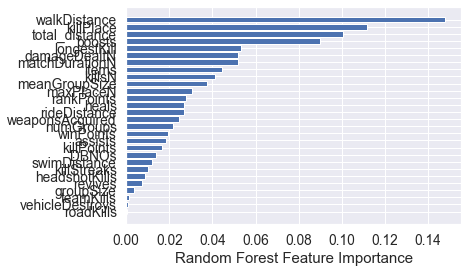

In [35]:
duo_feature_importance = duo_rf.feature_importances_
duo_sorted_idx = duo_feature_importance.argsort()
plt.barh(duo_xTrain.columns[duo_sorted_idx], duo_feature_importance[duo_sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = [0.01,0.02,0.03,0.04,0.05]
bestThre = 0.01
acc = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(duo_rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(duo_xTrain)
    # train model
    selection_model = RandomForestClassifier(n_estimators= 30)
    selection_model.fit(select_X_train, duo_yTrain)
    # eval model
    select_X_val = selection.transform(duo_xVal)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(duo_yVal, predictions)
    if accuracy > acc:
        acc = accuracy
        bestThre = thresh
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.010, n=21, Accuracy: 92.72%
Thresh=0.020, n=16, Accuracy: 92.65%
Thresh=0.030, n=11, Accuracy: 92.69%
Thresh=0.040, n=9, Accuracy: 92.67%
Thresh=0.050, n=7, Accuracy: 92.50%


In [37]:
indices = np.argsort(-duo_feature_importance)
i = 0
while duo_feature_importance[indices[i]] > bestThre:
    i += 1
print(i, ' features to keep')

21  features to keep


In [38]:
duo_featKeep = xTrain.columns[indices[:i]]
duo_featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'boosts', 'longestKill',
       'damageDealtN', 'matchDurationN', 'items', 'killsN', 'meanGroupSize',
       'maxPlaceN', 'rankPoints', 'heals', 'rideDistance', 'weaponsAcquired',
       'numGroups', 'winPoints', 'assists', 'killPoints', 'DBNOs',
       'swimDistance'],
      dtype='object')

### Squad data

In [39]:
# Find the important features for squad
squad_trainRF = squad_train.sample(n = 50000, random_state = 0)
squad_xTrain = squad_trainRF.copy().drop(columns ='y')
squad_yTrain = squad_trainRF['y']
squad_xVal = squad_val.copy().drop(columns ='y')
squad_yVal = squad_val['y']

In [40]:
squad_rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt')
squad_rf.fit(squad_xTrain, squad_yTrain)

RandomForestClassifier(max_features='sqrt')

Text(0.5, 0, 'Random Forest Feature Importance')

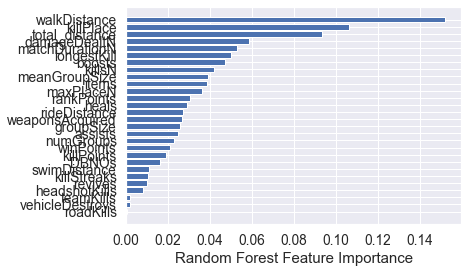

In [41]:
squad_feature_importance = squad_rf.feature_importances_
squad_sorted_idx = squad_feature_importance.argsort()
plt.barh(squad_xTrain.columns[squad_sorted_idx], squad_feature_importance[squad_sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = [0.01,0.02,0.03,0.04,0.05]
bestThre = 0.01
acc = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(squad_rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(squad_xTrain)
    # train model
    selection_model = RandomForestClassifier(n_estimators= 30)
    selection_model.fit(select_X_train, squad_yTrain)
    # eval model
    select_X_val = selection.transform(squad_xVal)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(squad_yVal, predictions)
    if accuracy > acc:
        acc = accuracy
        bestThre = thresh
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.010, n=23, Accuracy: 92.02%
Thresh=0.020, n=19, Accuracy: 91.93%
Thresh=0.030, n=12, Accuracy: 91.73%
Thresh=0.040, n=8, Accuracy: 91.71%
Thresh=0.050, n=5, Accuracy: 91.05%


In [43]:
indices = np.argsort(-squad_feature_importance)
i = 0
while squad_feature_importance[indices[i]] > bestThre:
    i += 1
print(i, ' features to keep')

23  features to keep


In [44]:
squad_featKeep = xTrain.columns[indices[:i]]
squad_featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'damageDealtN',
       'matchDurationN', 'longestKill', 'boosts', 'killsN', 'meanGroupSize',
       'items', 'maxPlaceN', 'rankPoints', 'heals', 'rideDistance',
       'weaponsAcquired', 'groupSize', 'assists', 'numGroups', 'winPoints',
       'killPoints', 'DBNOs', 'swimDistance', 'killStreaks'],
      dtype='object')

# Non-Penalty Logistic Regression

Since we have selected important features in feature engneering step above, we can use those features to train logistic regression model. Thus, when training logistic regression model without penalty, we will set the penalty term to be 'none'. Later on we will also train logistic regression models with penalty. Ref: https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno

### Solo Data

After importing the necessary packages for the basic EDA and using the missingno package, it seems that most data is present for this dataset.

In [46]:
solo_featKeep

Index(['walkDistance', 'killPlace', 'boosts', 'total_distance', 'damageDealtN',
       'killsN', 'matchDurationN', 'items', 'longestKill', 'meanGroupSize',
       'rankPoints', 'weaponsAcquired', 'heals', 'rideDistance', 'numGroups',
       'maxPlaceN'],
      dtype='object')

In [147]:
solo_train_log = solo_train[solo_featKeep.append(pd.Index(['y']))]
solo_test_log = solo_test[solo_featKeep.append(pd.Index(['y']))]
solo_val_log = solo_val[solo_featKeep.append(pd.Index(['y']))]

In order to avoid the class imbalance issue with a 1:9 split, we explore a resampling technique here using SMOTE. In our particular scenario, we oversample the minority class by synthetically generating additional samples.

In [49]:
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.linear_model import LogisticRegression

In [64]:
solo_xTrain = solo_train_log.copy().drop(columns ='y')
solo_yTrain = solo_train_log['y']
solo_xTest = solo_test_log.copy().drop(columns ='y')
solo_yTest = solo_test_log['y']

sm = SMOTE(random_state = 2)
solo_xTrain_res, solo_yTrain_res = sm.fit_sample(solo_xTrain, solo_yTrain.ravel())


Ref for below: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

### Logistic Regression Model Fitting

Using a Logistic Regression Model that doesn't have any penalty, the model never converge under a relatively large iteration limit (we have tried 5000). Nevertheless, the model is strong enough to achieve a decent accuracy.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
solo_clf = LogisticRegression(penalty = 'none',max_iter = 1000)
solo_model_res = solo_clf.fit(solo_xTrain_res, solo_yTrain_res)
#None penalty does not converge

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
y_pred = solo_clf.predict(solo_xTest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(solo_clf.score(solo_xTest, solo_yTest)))


Accuracy of logistic regression classifier on test set: 0.86


### Validation Score Calculation for Solo

In [127]:
# Accuracy
solo_clf.score(solo_val[solo_featKeep], solo_val['y'])

0.8624656048259075

In [137]:
# F-1 Score
from sklearn.metrics import f1_score
yPred_solo = solo_clf.predict(solo_val[solo_featKeep])
f1_score(solo_val['y'], yPred_solo)

0.5766811213583339

In [138]:
# Average Precision Score
from sklearn.metrics import average_precision_score
yProba = solo_clf.predict_proba(solo_val[solo_featKeep])[:,1]
average_precision_score(solo_val['y'], yProba)

0.672901755089386

### Validation ROC Curve for Solo

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

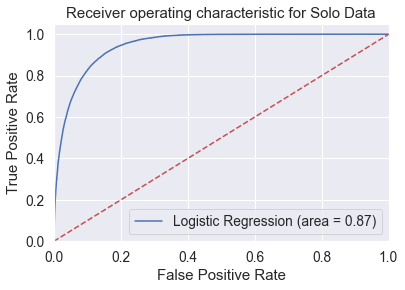

In [139]:
# ROC Curve graph
rf_roc_auc = roc_auc_score(solo_val['y'], yPred_solo)
fpr, tpr, thresholds = roc_curve(solo_val['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Solo Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_noPenal_Solo_Validation')
plt.show()


### Model Validation Score Calculation for Solo

In [140]:
# Accuracy
solo_clf.score(solo_modelVal[solo_featKeep], solo_modelVal['y'])

0.8625610617837721

In [141]:
# F-1 Score
from sklearn.metrics import f1_score
yPred_solo = solo_clf.predict(solo_modelVal[solo_featKeep])
f1_score(solo_modelVal['y'], yPred_solo)

0.575267030619511

In [142]:
# Average Precision Score
from sklearn.metrics import average_precision_score
yProba = solo_clf.predict_proba(solo_modelVal[solo_featKeep])[:,1]
average_precision_score(solo_modelVal['y'], yProba)

0.6758086812364356

### Model Validation ROC Curve for Solo

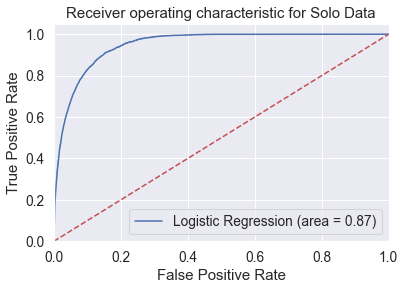

In [145]:
# ROC Curve graph
rf_roc_auc = roc_auc_score(solo_modelVal['y'], yPred_solo)
fpr, tpr, thresholds = roc_curve(solo_modelVal['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Solo Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_noPenal_Solo_ModelValidation')
plt.show()


### Duo Data

In [78]:
duo_featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'boosts', 'longestKill',
       'damageDealtN', 'matchDurationN', 'items', 'killsN', 'meanGroupSize',
       'maxPlaceN', 'rankPoints', 'heals', 'rideDistance', 'weaponsAcquired',
       'numGroups', 'winPoints', 'assists', 'killPoints', 'DBNOs',
       'swimDistance'],
      dtype='object')

In [79]:
duo_train_log = duo_train[duo_featKeep.append(pd.Index(['y']))]
duo_test_log = duo_test[duo_featKeep.append(pd.Index(['y']))]
duo_val_log = duo_val[duo_featKeep.append(pd.Index(['y']))]

In [80]:
duo_xTrain = duo_train_log.copy().drop(columns ='y')
duo_yTrain = duo_train_log['y']
duo_xTest = duo_test_log.copy().drop(columns ='y')
duo_yTest = duo_test_log['y']

sm = SMOTE(random_state = 2)
duo_xTrain_res, duo_yTrain_res = sm.fit_sample(duo_xTrain, duo_yTrain.ravel())

In [81]:
#Training Logistic Regression Model
duo_clf = LogisticRegression(penalty = 'none',max_iter = 1000)
duo_model_res = duo_clf.fit(duo_xTrain_res, duo_yTrain_res)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
y_pred = duo_clf.predict(duo_xTest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(duo_clf.score(duo_xTest, duo_yTest)))

Accuracy of logistic regression classifier on test set: 0.86


### Validation Score Calculation for Duo

In [149]:
# Accuracy
duo_clf.score(duo_val[duo_featKeep], duo_val['y'])

0.8590525243623177

In [150]:
# F-1 Score
from sklearn.metrics import f1_score
yPred_duo = duo_clf.predict(duo_val[duo_featKeep])
f1_score(duo_val['y'], yPred_duo)

0.5671373584319641

In [151]:
# Average Precision Score
from sklearn.metrics import average_precision_score
yProba = duo_clf.predict_proba(duo_val[duo_featKeep])[:,1]
average_precision_score(duo_val['y'], yProba)

0.6446634526795847

### Validation ROC Curve for Duo

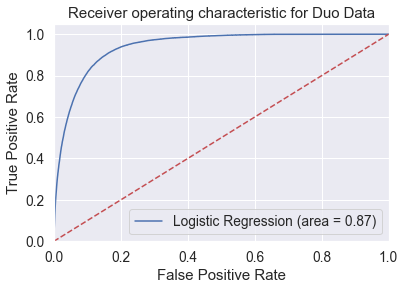

In [152]:
# ROC Curve graph
rf_roc_auc = roc_auc_score(duo_val['y'], yPred_duo)
fpr, tpr, thresholds = roc_curve(duo_val['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Duo Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_noPenal_Duo_Validation')
plt.show()


### Model Validation Score Calculation for Duo

In [153]:
# Accuracy
duo_clf.score(duo_modelVal[duo_featKeep], duo_modelVal['y'])

0.8572031929720826

In [154]:
# F-1 Score
from sklearn.metrics import f1_score
yPred_duo = duo_clf.predict(duo_modelVal[duo_featKeep])
f1_score(duo_modelVal['y'], yPred_duo)

0.5619898950641274

In [155]:
# Average Precision Score
from sklearn.metrics import average_precision_score
yProba = duo_clf.predict_proba(duo_modelVal[duo_featKeep])[:,1]
average_precision_score(duo_modelVal['y'], yProba)

0.6365719758173967

### Model Validation ROC Curve for Duo

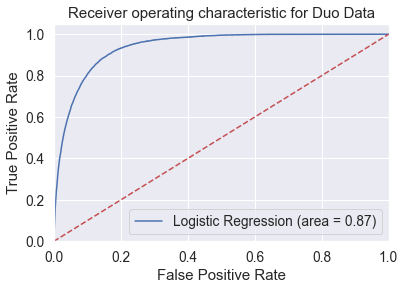

In [156]:
# ROC Curve graph
rf_roc_auc = roc_auc_score(duo_modelVal['y'], yPred_duo)
fpr, tpr, thresholds = roc_curve(duo_modelVal['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Duo Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_noPenal_Duo_ModelValidation')
plt.show()

### Squad Data

In [91]:
squad_featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'damageDealtN',
       'matchDurationN', 'longestKill', 'boosts', 'killsN', 'meanGroupSize',
       'items', 'maxPlaceN', 'rankPoints', 'heals', 'rideDistance',
       'weaponsAcquired', 'groupSize', 'assists', 'numGroups', 'winPoints',
       'killPoints', 'DBNOs', 'swimDistance', 'killStreaks'],
      dtype='object')

In [101]:
squad_train_log = squad_train[squad_featKeep.append(pd.Index(['y']))]
squad_test_log = squad_test[squad_featKeep.append(pd.Index(['y']))]
squad_val_log = squad_val[squad_featKeep.append(pd.Index(['y']))]

In [102]:
squad_xTrain = squad_train_log.copy().drop(columns ='y')
squad_yTrain = squad_train_log['y']
squad_xTest = squad_test_log.copy().drop(columns ='y')
squad_yTest = squad_test_log['y']

sm = SMOTE(random_state = 2)
squad_xTrain_res, squad_yTrain_res = sm.fit_sample(squad_xTrain, squad_yTrain.ravel())

In [103]:
#Training Logistic Regression Model
squad_clf = LogisticRegression(penalty = 'none',max_iter = 1000)
squad_model_res = squad_clf.fit(squad_xTrain_res, squad_yTrain_res)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
y_pred = squad_clf.predict(squad_xTest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(squad_clf.score(squad_xTest, squad_yTest)))

Accuracy of logistic regression classifier on test set: 0.84


### Validation Score Calculation for Squad

In [157]:
# Accuracy
squad_clf.score(squad_val[squad_featKeep], squad_val['y'])

0.8392798944364512

In [158]:
# F-1 Score
from sklearn.metrics import f1_score
yPred_squad = squad_clf.predict(squad_val[squad_featKeep])
f1_score(squad_val['y'], yPred_squad)

0.526617694401358

In [160]:
# Average Precision Score
from sklearn.metrics import average_precision_score
yProba = squad_clf.predict_proba(squad_val[squad_featKeep])[:,1]
average_precision_score(squad_val['y'], yProba)

0.5441094716816459

### Validation ROC Curve for Squad

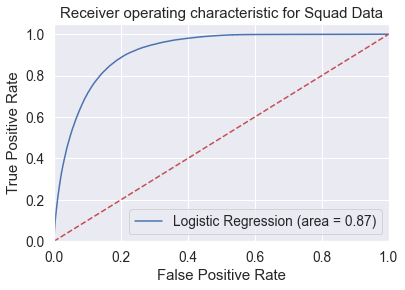

In [162]:
# ROC Curve graph
rf_roc_auc = roc_auc_score(squad_val['y'], yPred_squad)
fpr, tpr, thresholds = roc_curve(squad_val['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Squad Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_noPenal_Squad_Validation')
plt.show()

### Model Validation Score Calculation for Squad

In [163]:
# Accuracy
squad_clf.score(squad_modelVal[squad_featKeep], squad_modelVal['y'])

0.8392175594644604

In [164]:
# F-1 Score
from sklearn.metrics import f1_score
yPred_squad = squad_clf.predict(squad_modelVal[squad_featKeep])
f1_score(squad_modelVal['y'], yPred_squad)

0.5264049394858346

In [165]:
# Average Precision Score
from sklearn.metrics import average_precision_score
yProba = squad_clf.predict_proba(squad_modelVal[squad_featKeep])[:,1]
average_precision_score(squad_modelVal['y'], yProba)

0.5415387016948032

### Model Validation ROC Curve for Squad

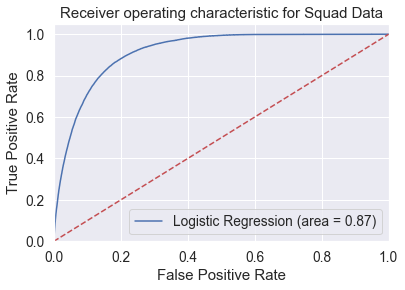

In [168]:
# ROC Curve graph
rf_roc_auc = roc_auc_score(squad_modelVal['y'], yPred_squad)
fpr, tpr, thresholds = roc_curve(squad_modelVal['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Squad Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_noPenal_Squad_ModelValidation')
plt.show()

### Full Data

In [109]:
featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'boosts', 'damageDealtN',
       'longestKill', 'matchDurationN', 'killsN', 'items', 'meanGroupSize',
       'maxPlaceN', 'rankPoints', 'numGroups', 'rideDistance',
       'weaponsAcquired', 'heals', 'winPoints', 'killPoints', 'assists',
       'groupSize', 'DBNOs', 'swimDistance', 'killStreaks'],
      dtype='object')

In [ ]:
xTrain_full = train[featKeep]

In [114]:
full_train_log = train[featKeep.append(pd.Index(['y']))]
full_test_log = test[featKeep.append(pd.Index(['y']))]
full_val_log = validation[featKeep.append(pd.Index(['y']))]

In [115]:
full_xTrain = full_train_log.copy().drop(columns ='y')
full_yTrain = full_train_log['y']
full_xTest = full_test_log.copy().drop(columns ='y')
full_yTest = full_test_log['y']

sm = SMOTE(random_state = 2)
full_xTrain_res, full_yTrain_res = sm.fit_sample(full_xTrain, full_yTrain.ravel())

In [116]:
#Training Logistic Regression Model
full_clf = LogisticRegression(penalty = 'none',max_iter = 1000)
full_model_res = full_clf.fit(full_xTrain_res, full_yTrain_res)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
y_pred = full_clf.predict(full_xTest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(full_clf.score(full_xTest, full_yTest)))

Accuracy of logistic regression classifier on test set: 0.85


### Validation Score Calculation for Full

In [182]:
# Accuracy
full_clf.score(validation[featKeep], validation['y'])

0.8533568620644212

In [183]:
# F-1 Score
from sklearn.metrics import f1_score
yPred_full = full_clf.predict(validation[featKeep])
f1_score(validation['y'], yPred_full)

0.545023602154112

In [184]:
# Average Precision Score 
from sklearn.metrics import average_precision_score
yProba = full_clf.predict_proba(validation[featKeep])[:,1]
average_precision_score(validation['y'], yProba)

0.5707679674294923

### Validation ROC Curve for Full

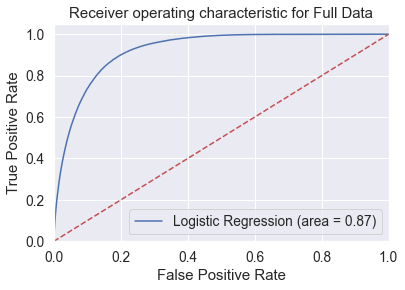

In [185]:
# ROC Curve graph
rf_roc_auc = roc_auc_score(validation['y'], yPred_full)
fpr, tpr, thresholds = roc_curve(validation['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Full Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_NoPenal_Full_Validation')
plt.show()

### Model Validation Score Calculation for Full

In [187]:
# Accuracy
full_clf.score(modelVal[featKeep], modelVal['y'])

0.8525167625838129

In [188]:
# F-1 Score
from sklearn.metrics import f1_score
yPred_full = full_clf.predict(modelVal[featKeep])
f1_score(modelVal['y'], yPred_full)

0.5422179456338706

In [189]:
# Average Precision Score 
from sklearn.metrics import average_precision_score
yProba = full_clf.predict_proba(modelVal[featKeep])[:,1]
average_precision_score(modelVal['y'], yProba)

0.5678215823013542

### Model Validation ROC Curve for Full

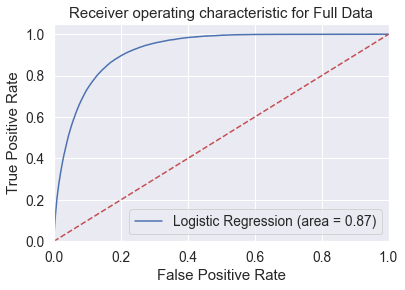

In [190]:
# ROC Curve graph
rf_roc_auc = roc_auc_score(modelVal['y'], yPred_full)
fpr, tpr, thresholds = roc_curve(modelVal['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Full Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_NoPenal_Full_ModelValidation')
plt.show()